# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
ALLmouseDF = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
ALLmouseDF.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,45.000000,0
1,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,38.825898,0
2,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,35.014271,1


In [3]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Checking the number of mice.
# wouldn't accept simple mouseCOUNT = len(ALLmouseDF["Mouse ID"].unique()) ---AttributeError: 'Series' object has no attribute 'unqiue' the first 6 times????
mouseCOUNT = len(ALLmouseDF["Mouse ID"].unique())
mouseCOUNT

249

In [105]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# SEEMS LIKE THIS SHOULD JUST RETURN THE DUPLICATED ROW #fixed - needed 2nd id

DUPEmouse1 = ALLmouseDF.loc[ALLmouseDF.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
DUPEmouse1

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
DUPEmouse2 = ALLmouseDF[ALLmouseDF[["Mouse ID", "Timepoint"]].duplicated()]
DUPEmouse2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,45.000000,0
911,g989,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,47.570392,0
913,g989,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,49.880528,0
915,g989,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,53.442020,0
917,g989,Propriva,Female,21,26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,54.657650,1


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Error: AttributeError: 'function' object has no attribute 'drop_duplicates' - have to keep restarting kernel (4 times by this cell)
# why wouldn't ALLmouseDF = ALLmouseDF.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False) not work?
cleanedALLmouseDF = ALLmouseDF.loc[ALLmouseDF["Mouse ID"] != "g989"]
#pollDF.loc[pollDF["Candidate"] == "Charles Casper Stockham"]
cleanedALLmouseDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,45.000000,0
1,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,38.825898,0
2,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,35.014271,1
3,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,34.223992,1
4,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,32.997729,1


In [112]:
# Checking the number of mice in the clean DataFrame.
# FIX - should be 248 #fixed
newmouseCOUNT = len(cleanedALLmouseDF["Mouse ID"].unique())
newmouseCOUNT

248

## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumorvol = cleanedALLmouseDF.groupby(["Drug Regimen"])

tumorMEAN = tumorvol["Tumor Volume (mm3)"].mean()
tumorMEDIAN = tumorvol["Tumor Volume (mm3)"].median()
tumorVARIANCE = tumorvol["Tumor Volume (mm3)"].var()
tumorSTD = tumorvol["Tumor Volume (mm3)"].std()
tumorSEM = tumorvol["Tumor Volume (mm3)"].sem()

tumorsDF = pd.DataFrame({"MEAN": tumorMEAN,
                        "MEDIAN": tumorMEDIAN,
                        "VARIANCE": tumorVARIANCE,
                        "STANDARD DEVIATION": tumorSTD,
                        "STANDARD ERROR OF MEAN": tumorSEM})
                        
tumorsDF

,MEAN,MEDIAN,VARIANCE,STANDARD DEVIATION,STANDARD ERROR OF MEAN
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [114]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor1line = cleanedALLmouseDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor1line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [115]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# use accidentroadtypecounts 
barchartresults = cleanedALLmouseDF.groupby("Drug Regimen")
barchartresults = barchartresults["Drug Regimen"].count()
barchartresults

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

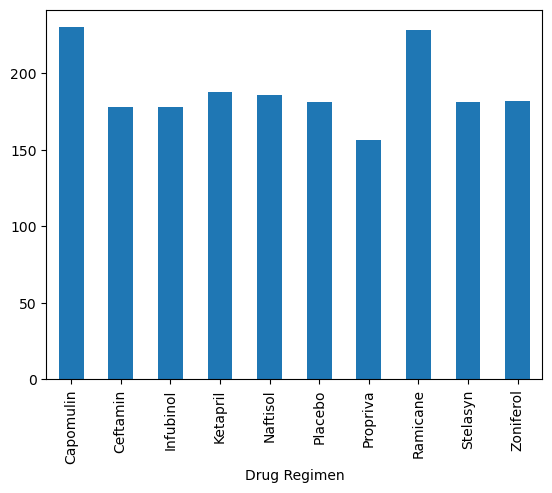

In [12]:
barchartresults.plot(kind="bar")
plt.show()

In [239]:
barchartresultsDF = cleanedALLmouseDF.filter(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"], axis=1)
#barchartresults = barchartresults["Drug Regimen"].count()
#barchartresultsDF = pd.DataFrame(barchartresults)
barchartresultsDF

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
1888,z969,Naftisol,63.145652
1889,z969,Naftisol,65.841013
1890,z969,Naftisol,69.176246
1891,z969,Naftisol,70.314904


In [124]:
drugLIST = cleanedALLmouseDF["Drug Regimen"].unique()
drugLIST

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [266]:
#in OneNote

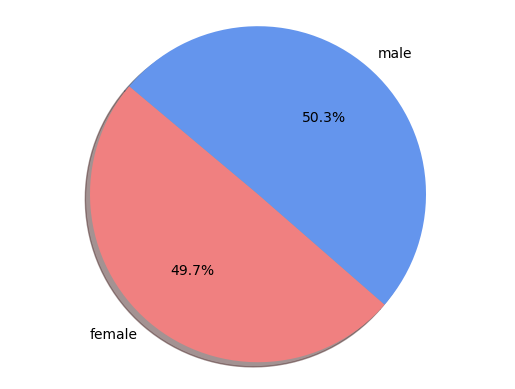

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
malemiceCOUNT = len(cleanedALLmouseDF.loc[cleanedALLmouseDF["Sex"] == "Male"]["Mouse ID"].unique())
femalemiceCOUNT = len(cleanedALLmouseDF.loc[cleanedALLmouseDF["Sex"] == "Female"]["Mouse ID"].unique())

malePERC = malemiceCOUNT/ newmouseCOUNT
femalePERC = femalemiceCOUNT/ newmouseCOUNT

labels = ["female", "male"]

# The values of each section of the pie chart
genders = [femalePERC, malemicePERC]

# The colors of each section of the pie chart
colors = ["lightcoral", "cornflowerblue"]
         
plt.pie(genders, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()    


<Axes: ylabel='Genders'>

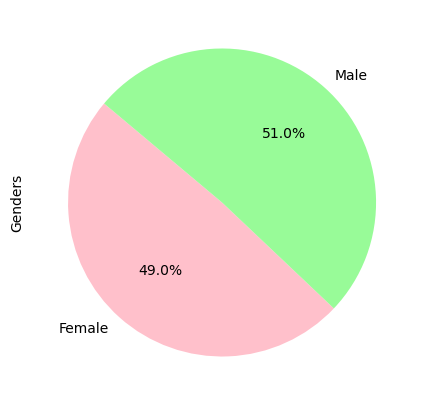

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderchart = cleanedALLmouseDF.groupby(['Sex'])['Sex'].count()
genderchart.plot.pie(ylabel="Genders", startangle=140, autopct='%1.1f%%', colors=["pink", "palegreen"], figsize=(5, 5))


## Quartiles, Outliers and Boxplots

In [196]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

fourdrugs = cleanedALLmouseDF.loc[(cleanedALLmouseDF["Drug Regimen"] == "Capomulin") |
                                  (cleanedALLmouseDF["Drug Regimen"] == "Ramicane") |
                                  (cleanedALLmouseDF["Drug Regimen"] == "Infubinol") |
                                  (cleanedALLmouseDF["Drug Regimen"] == "Ceftamin")]

fourdrugs["Drug Regimen"].unique()

finalVOL = fourdrugs.groupby(["Mouse ID"])["Timepoint"].max()
finalVOL = finalVOL.reset_index()
finalVOL

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [220]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#this doesn't seem right

finalVOLandTIME = cleanedALLmouseDF.merge(cleanedALLmouseDF, how="left", on=["Mouse ID", "Timepoint"])
finalVOLandTIME


,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Unnamed: 5_x,Unnamed: 6_x,Unnamed: 7_x,Unnamed: 8_x,Unnamed: 9_x,...,Unnamed: 14_y,Unnamed: 15_y,Unnamed: 16_y,Unnamed: 17_y,Unnamed: 18_y,Unnamed: 19_y,Unnamed: 20_y,Unnamed: 21_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,0
1,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.825898,0
2,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.014271,1
3,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.223992,1
4,k403,Ramicane,Male,21,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.997729,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.145652,2
1876,z969,Naftisol,Male,9,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.841013,3
1877,z969,Naftisol,Male,9,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.176246,4
1878,z969,Naftisol,Male,9,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.314904,4


## Line and Scatter Plots

In [161]:
import numpy as np

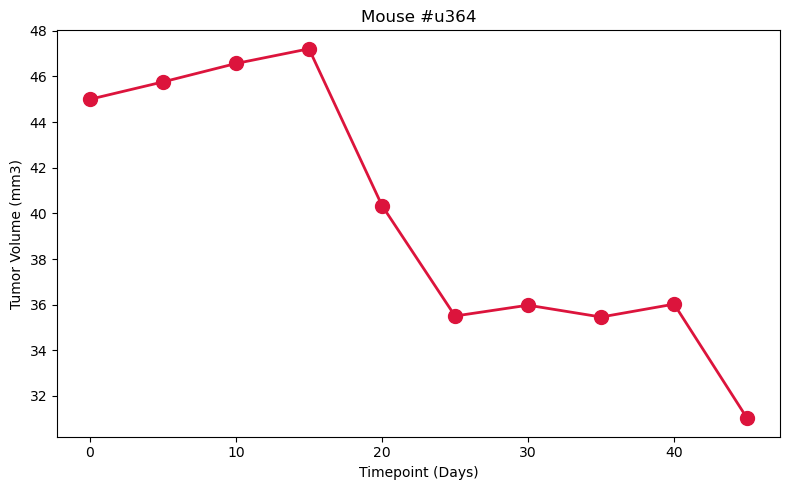

In [203]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulinmouse = cleanedALLmouseDF.loc[cleanedALLmouseDF["Drug Regimen"] == "Capomulin"]
capomulinmouse.head() #u364

u364 = capomulinmouse.loc[capomulinmouse["Mouse ID"] == "u364"]
u364

# Set x axis and variables
x_axis = u364["Timepoint"]
u364tumorVOL = u364["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.title("Mouse #u364")
plt.plot(x_axis, u364tumorVOL, markersize=10, marker="o", color="crimson", linewidth=2)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

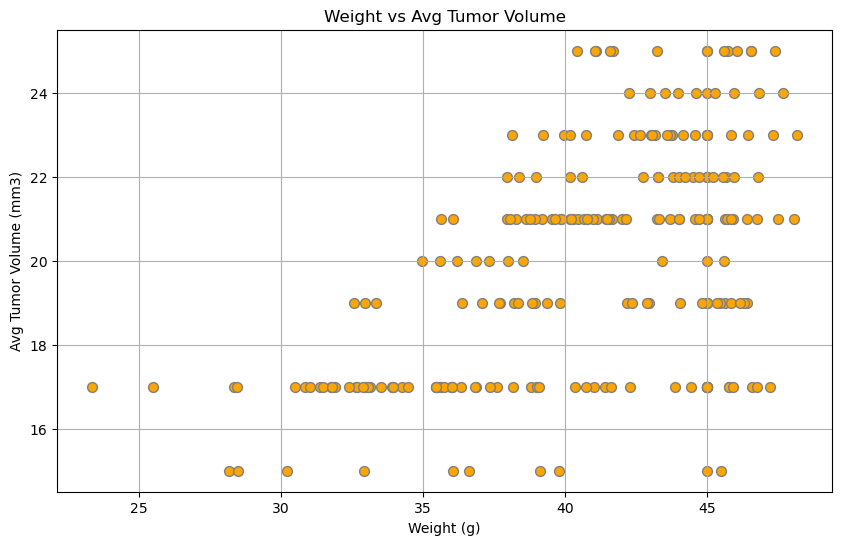

In [175]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#capomulinPLOT = capomulinmouse.groupby(["Mouse ID"]).mean()

capomulinPLOT = cleanedALLmouseDF.loc[cleanedALLmouseDF["Drug Regimen"] == "Capomulin"]
fig1, ax1 = plt.subplots(figsize=(10, 6))

plt.scatter(capomulinPLOT["Tumor Volume (mm3)"], capomulinPLOT["Weight (g)"], s=50, color="orange", edgecolor="gray", marker="o")
plt.grid()

plt.title("Weight vs Avg Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
markersize=10

plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
